In [1]:
# K-means
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 0)

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D


In [2]:
data = pd.read_csv('top_11482_songs.csv')
data

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,A Design for Life - Remastered,Manic Street Preachers,0uJyE3M3ecGZgzltsQKs3a,52,0.184,0.8410,0.0,-4.723,1.0,0.0468,0.000811,0.000045,0.0422,0.349,88.224,audio_features,0uJyE3M3ecGZgzltsQKs3a,spotify:track:0uJyE3M3ecGZgzltsQKs3a,https://api.spotify.com/v1/tracks/0uJyE3M3ecGZ...,https://api.spotify.com/v1/audio-analysis/0uJy...,257640.0,4.0
1,Nature Boy,Nat King Cole,2WMyu5IYgxEuCd6xgFgJrl,58,0.275,0.0895,2.0,-19.755,0.0,0.0374,0.971000,0.022100,0.1080,0.111,104.144,audio_features,2WMyu5IYgxEuCd6xgFgJrl,spotify:track:2WMyu5IYgxEuCd6xgFgJrl,https://api.spotify.com/v1/tracks/2WMyu5IYgxEu...,https://api.spotify.com/v1/audio-analysis/2WMy...,173533.0,4.0
2,Bohemian Rhapsody - Remastered 2011,Queen,1AhDOtG9vPSOmsWgNW0BEY,0,0.414,0.4040,0.0,-9.928,0.0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,audio_features,1AhDOtG9vPSOmsWgNW0BEY,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,https://api.spotify.com/v1/tracks/1AhDOtG9vPSO...,https://api.spotify.com/v1/audio-analysis/1AhD...,354320.0,4.0
3,Tainted Love,Soft Cell,3HnqpxXpizCRADKCU78cLk,0,0.518,0.5100,0.0,-8.057,0.0,0.0352,0.476000,0.000000,0.2920,0.651,144.543,audio_features,3HnqpxXpizCRADKCU78cLk,spotify:track:3HnqpxXpizCRADKCU78cLk,https://api.spotify.com/v1/tracks/3HnqpxXpizCR...,https://api.spotify.com/v1/audio-analysis/3Hnq...,153880.0,4.0
4,Ode To Billie Joe,Bobbie Gentry,3ZsLNrysR0UFbjcaIEcDTj,10,0.595,0.1820,7.0,-11.078,1.0,0.0517,0.786000,0.000000,0.0847,0.642,117.352,audio_features,3ZsLNrysR0UFbjcaIEcDTj,spotify:track:3ZsLNrysR0UFbjcaIEcDTj,https://api.spotify.com/v1/tracks/3ZsLNrysR0UF...,https://api.spotify.com/v1/audio-analysis/3ZsL...,254600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Charles Koechlin,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0
11478,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Gabriel Fauré,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0
11479,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Sarah Wegener,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0
11480,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Stuttgart Radio Symphony Orchestra,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0


In [3]:
data.dtypes

song_name            object
name                 object
song_id              object
popularity            int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object

In [4]:
data_num = data.select_dtypes('number')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11482 entries, 0 to 11481
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        11482 non-null  int64  
 1   danceability      11482 non-null  float64
 2   energy            11482 non-null  float64
 3   key               11482 non-null  float64
 4   loudness          11482 non-null  float64
 5   mode              11482 non-null  float64
 6   speechiness       11482 non-null  float64
 7   acousticness      11482 non-null  float64
 8   instrumentalness  11482 non-null  float64
 9   liveness          11482 non-null  float64
 10  valence           11482 non-null  float64
 11  tempo             11482 non-null  float64
 12  duration_ms       11482 non-null  float64
 13  time_signature    11482 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.2 MB


In [5]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,11482.0,26.413256,23.467765,0.000000,0.00000,25.000000,44.0000,93.000
danceability,11482.0,0.543739,0.159439,0.000000,0.43900,0.554000,0.6580,0.988
energy,11482.0,0.621612,0.239886,0.002660,0.44700,0.657000,0.8250,0.999
key,11482.0,5.189514,3.567796,0.000000,2.00000,5.000000,9.0000,11.000
loudness,11482.0,-9.318358,4.289052,-39.219000,-11.65075,-8.501000,-6.2555,-0.086
mode,11482.0,0.726790,0.445627,0.000000,0.00000,1.000000,1.0000,1.000
speechiness,11482.0,0.064100,0.066595,0.000000,0.03330,0.042000,0.0634,0.956
acousticness,11482.0,0.331629,0.331027,0.000001,0.02990,0.202000,0.6330,0.996
instrumentalness,11482.0,0.088958,0.228745,0.000000,0.00000,0.000087,0.0113,0.993
liveness,11482.0,0.201405,0.163957,0.012400,0.09370,0.137000,0.2680,0.987


In [6]:
# Scaling/Normalizing the data

scaler = MinMaxScaler().fit(data_num) 
data_scaled_arr = scaler.transform(data_num)
data_scaled = pd.DataFrame(data_scaled_arr, columns=data_num.columns)
display(data_scaled.describe().T)


,count,mean,std,min,25%,50%,75%,max
popularity,11482.0,0.284014,0.252342,0.0,0.000000,0.268817,0.473118,1.0
danceability,11482.0,0.550343,0.161376,0.0,0.444332,0.560729,0.665992,1.0
energy,11482.0,0.621226,0.240767,0.0,0.445972,0.656744,0.825361,1.0
key,11482.0,0.471774,0.324345,0.0,0.181818,0.454545,0.818182,1.0
loudness,11482.0,0.764077,0.109602,0.0,0.704476,0.784964,0.842345,1.0
mode,11482.0,0.726790,0.445627,0.0,0.000000,1.000000,1.000000,1.0
speechiness,11482.0,0.067050,0.069660,0.0,0.034833,0.043933,0.066318,1.0
acousticness,11482.0,0.332960,0.332357,0.0,0.030019,0.202810,0.635542,1.0
instrumentalness,11482.0,0.089585,0.230358,0.0,0.000000,0.000088,0.011380,1.0
liveness,11482.0,0.193931,0.168230,0.0,0.083419,0.127847,0.262261,1.0


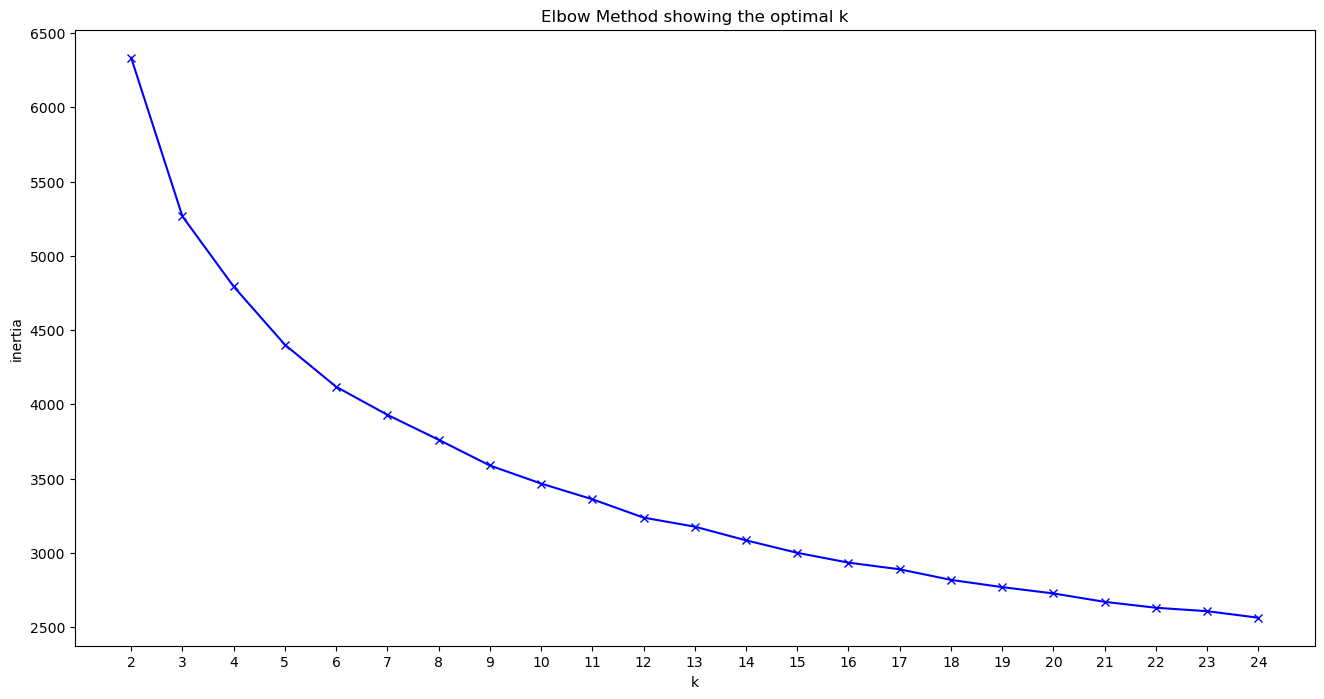

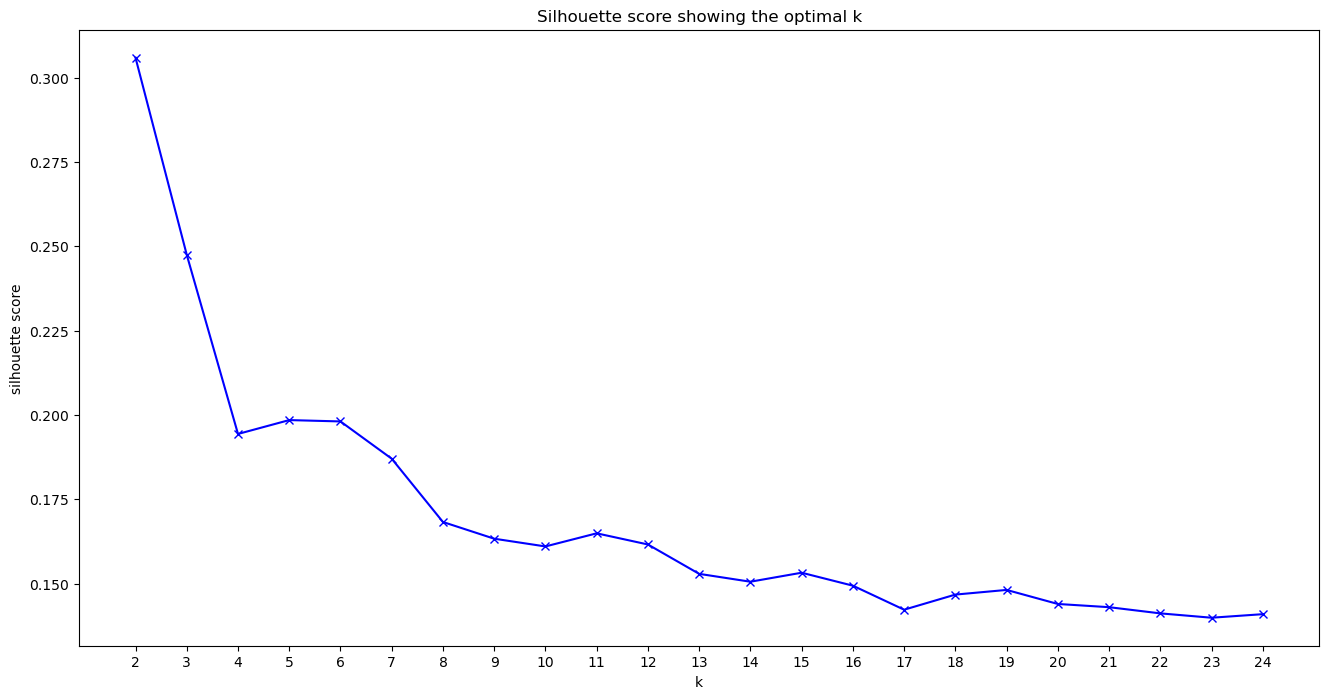

In [9]:
K = range(2, 25)
inertia = []
silhouette = []


for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=1234)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_scaled, kmeans.predict(data_scaled)))

%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show()

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=1234)
kmeans.fit(data_scaled)

# Predicting / assigning the clusters:
clusters = kmeans.predict(data_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2461
1    2778
2    3106
3    2267
4     870
Name: count, dtype: int64

In [16]:
data['cluster'] = clusters.tolist()
data

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,A Design for Life - Remastered,Manic Street Preachers,0uJyE3M3ecGZgzltsQKs3a,52,0.184,0.8410,0.0,-4.723,1.0,0.0468,0.000811,0.000045,0.0422,0.349,88.224,audio_features,0uJyE3M3ecGZgzltsQKs3a,spotify:track:0uJyE3M3ecGZgzltsQKs3a,https://api.spotify.com/v1/tracks/0uJyE3M3ecGZ...,https://api.spotify.com/v1/audio-analysis/0uJy...,257640.0,4.0,1
1,Nature Boy,Nat King Cole,2WMyu5IYgxEuCd6xgFgJrl,58,0.275,0.0895,2.0,-19.755,0.0,0.0374,0.971000,0.022100,0.1080,0.111,104.144,audio_features,2WMyu5IYgxEuCd6xgFgJrl,spotify:track:2WMyu5IYgxEuCd6xgFgJrl,https://api.spotify.com/v1/tracks/2WMyu5IYgxEu...,https://api.spotify.com/v1/audio-analysis/2WMy...,173533.0,4.0,4
2,Bohemian Rhapsody - Remastered 2011,Queen,1AhDOtG9vPSOmsWgNW0BEY,0,0.414,0.4040,0.0,-9.928,0.0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,audio_features,1AhDOtG9vPSOmsWgNW0BEY,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,https://api.spotify.com/v1/tracks/1AhDOtG9vPSO...,https://api.spotify.com/v1/audio-analysis/1AhD...,354320.0,4.0,4
3,Tainted Love,Soft Cell,3HnqpxXpizCRADKCU78cLk,0,0.518,0.5100,0.0,-8.057,0.0,0.0352,0.476000,0.000000,0.2920,0.651,144.543,audio_features,3HnqpxXpizCRADKCU78cLk,spotify:track:3HnqpxXpizCRADKCU78cLk,https://api.spotify.com/v1/tracks/3HnqpxXpizCR...,https://api.spotify.com/v1/audio-analysis/3Hnq...,153880.0,4.0,4
4,Ode To Billie Joe,Bobbie Gentry,3ZsLNrysR0UFbjcaIEcDTj,10,0.595,0.1820,7.0,-11.078,1.0,0.0517,0.786000,0.000000,0.0847,0.642,117.352,audio_features,3ZsLNrysR0UFbjcaIEcDTj,spotify:track:3ZsLNrysR0UFbjcaIEcDTj,https://api.spotify.com/v1/tracks/3ZsLNrysR0UF...,https://api.spotify.com/v1/audio-analysis/3ZsL...,254600.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Charles Koechlin,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4
11478,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Gabriel Fauré,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4
11479,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Sarah Wegener,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4
11480,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Stuttgart Radio Symphony Orchestra,6xKYMiIeGvGhsWYqF0hNcT,49,0.000,0.0170,6.0,-33.687,0.0,0.0000,0.972000,0.854000,0.0752,0.000,0.000,audio_features,6xKYMiIeGvGhsWYqF0hNcT,spotify:track:6xKYMiIeGvGhsWYqF0hNcT,https://api.spotify.com/v1/tracks/6xKYMiIeGvGh...,https://api.spotify.com/v1/audio-analysis/6xKY...,63800.0,0.0,4


In [17]:
final = data[['song_name', 'name', 'song_id', 'cluster']]
final

,song_name,name,song_id,cluster
0,A Design for Life - Remastered,Manic Street Preachers,0uJyE3M3ecGZgzltsQKs3a,1
1,Nature Boy,Nat King Cole,2WMyu5IYgxEuCd6xgFgJrl,4
2,Bohemian Rhapsody - Remastered 2011,Queen,1AhDOtG9vPSOmsWgNW0BEY,4
3,Tainted Love,Soft Cell,3HnqpxXpizCRADKCU78cLk,4
4,Ode To Billie Joe,Bobbie Gentry,3ZsLNrysR0UFbjcaIEcDTj,0
...,...,...,...,...
11477,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Charles Koechlin,6xKYMiIeGvGhsWYqF0hNcT,4
11478,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Gabriel Fauré,6xKYMiIeGvGhsWYqF0hNcT,4
11479,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Sarah Wegener,6xKYMiIeGvGhsWYqF0hNcT,4
11480,"Pelleas et Melisande, Op. 80 (arr. C. Koechlin...",Stuttgart Radio Symphony Orchestra,6xKYMiIeGvGhsWYqF0hNcT,4


In [18]:
final.to_csv('clustered_songs.csv', index=False)

In [19]:
import pickle

In [20]:
pickle.dump(kmeans, open('clustering_model.pkl','wb'))
pickle.dump(scaler, open('scaler_model.pkl','wb'))

In [21]:
# Loading model to compare the results
model = pickle.load(open('clustering_model.pkl','rb'))
scale = pickle.load(open('scaler_model.pkl','rb'))

In [22]:
model

KMeans(n_clusters=5, n_init=10, random_state=1234)

In [23]:
scale

MinMaxScaler()